In [ ]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn import neighbors
from statistics import mode
from sklearn import model_selection
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm
import collections
from collections import Counter

(a) Join the Digit Recognizer competition on Kaggle. Download the training and test data. The competition page describes how these files are formatted.

In [ ]:
#load dataset
dtrain = pd.read_csv('digit-train.csv', header = 0, dtype = np.int)
X_dtest = pd.read_csv('digit-test.csv', header = 0, dtype = np.int)
#dtrain.head()
X_dtrain = dtrain.drop('label', axis = 1)
Y_dtrain = dtrain['label']

#get the height and width
height = width =  int((dtrain.shape[1] - 1) ** 0.5)
print(height, width)

(b) Write a function to display an MNIST digit. Display one of each digit.

In [ ]:
#display the index[2].
dis_mnist_digit = []
for i in range(0,10):
    dis_mnist_digit.append(dtrain[dtrain.label == i].index[2])
dis_mnist_digit = {i:dis_mnist_digit[i] for i in range(0,10)}
print(dis_mnist_digit)

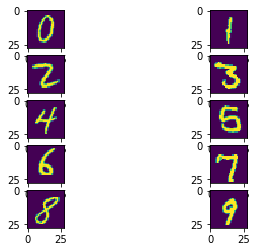

In [4]:
#make a subplot.
fig, ax = plt.subplots(nrows = 5, ncols = 2)        #fit the 10 images into 5*2 subplots to make it easier to observe.

def generate_image(index):
    image_matrix = X_dtrain.loc[index].values.reshape((height,width))      #load the height&width in previous part.
    return image_matrix

#plot one of each digit.
ax[0, 0].imshow(generate_image(dis_mnist_digitt[0]))
ax[0, 1].imshow(generate_image(dis_mnist_digit[1]))
ax[1, 0].imshow(generate_image(dis_mnist_digit[2]))
ax[1, 1].imshow(generate_image(dis_mnist_digit[3]))
ax[2, 0].imshow(generate_image(dis_mnist_digit[4]))
ax[2, 1].imshow(generate_image(dis_mnist_digit[5]))
ax[3, 0].imshow(generate_image(dis_mnist_digit[6]))
ax[3, 1].imshow(generate_image(dis_mnist_digit[7]))
ax[4, 0].imshow(generate_image(dis_mnist_digit[8]))
ax[4, 1].imshow(generate_image(dis_mnist_digit[9]))

plt.show()

(c) Examine the prior probability of the classes in the training data. Is it uniform across the digits? Display a normalized histogram of digit counts. Is it even?

In [5]:
#examine the prior probability.
dtrain_freq = pd.DataFrame(Y_dtrain.value_counts()).reset_index()                                         #count the classes.
dtrain_freq.sort_values(by = ['label'])                                                                                  #sort the digits by no. of counts

#Index: ["Digit"] 
#Label: ["Count"]


,digit,count
0,1,4684
1,7,4401
2,3,4351
3,9,4188
4,2,4177
5,6,4137
6,0,4132
7,4,4072
8,8,4063
9,5,3795


Text(0.5, 0, 'digit')

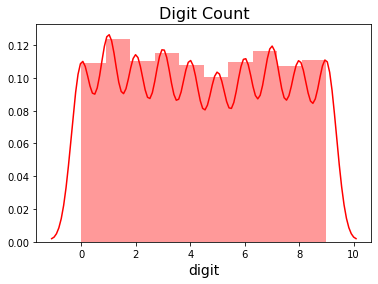

In [6]:
#display a normalized histogram of digit counts.
sns.distplot(Y_dtrain, bins = 10, color = 'red')
plt.title('Digit Count', fontsize = 16)
plt.xlabel('digit', fontsize = 14)

It seems like a uniform distribution across the dights and almost even.

(d) Pick one example of each digit from your training data. Then, for each sample digit, compute and show the best match (nearest neighbor) between your chosen sample and the rest of the training data. Use L2 distance between the two images’ pixel values as the metric. This probably won’t be perfect, so add an asterisk next to the erroneous examples (if any).

In [7]:
#from above, we picked the [2] digit
def generate_nearest_neighbor(index):                                                                                         #compute the nearest neighbor of our example
    neighbors = np.argsort(((np.array(X_dtrain) - np.array(X_dtrain.iloc[index]))**2).sum(-1))
    nearest_neighbor = neighbors[1]
    if Y_dtrain[index] == Y_dtrain[best_match]:
        right = True
    return nearest_neighbor

nearest_neighbor = []                                                                                                                #show the best match for each of the [2] digit
for i in range(0,10):
    nearest_neighbor.append(generate_nearest_neighbor(dis_mnist_digit[i]))
nearest_neighbor                                                                                                                      #display the [n] of the best match

[25196, 29923, 4704, 9240, 7204, 10674, 34338, 10446, 14340, 8935]

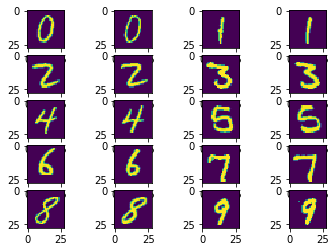

In [8]:
#import pandas as pd
#import matplotlib.pyplot as plt
#plot the orginal digits and their best match into a 5*4 subplots

fig, ax = plt.subplots(5,4)

def ex_img(index):                                                                                                           #plot each pair of digits side by side
    image_matrix = X_dtrain.loc[index].values.reshape((height,width))                           
    return image_matrix

ax[0, 0].imshow(ex_img(dis_mnist_digit[0]))
ax[0, 1].imshow(ex_img(25196))
ax[0, 2].imshow(ex_img(dis_mnist_digit[1]))
ax[0, 3].imshow(ex_img(29923))
ax[1, 0].imshow(ex_img(dis_mnist_digit[2]))
ax[1, 1].imshow(ex_img(4704))
ax[1, 2].imshow(ex_img(dis_mnist_digit[3]))
ax[1, 3].imshow(ex_img(9240))
ax[2, 0].imshow(ex_img(dis_mnist_digit[4]))
ax[2, 1].imshow(ex_img(7204))
ax[2, 2].imshow(ex_img(dis_mnist_digit[5]))
ax[2, 3].imshow(ex_img(10674))
ax[3, 0].imshow(ex_img(dis_mnist_digit[6]))
ax[3, 1].imshow(ex_img(34338))
ax[3, 2].imshow(ex_img(dis_mnist_digit[7]))
ax[3, 3].imshow(ex_img(10446))
ax[4, 0].imshow(ex_img(dis_mnist_digit[8]))
ax[4, 1].imshow(ex_img(14340))
ax[4, 2].imshow(ex_img(dis_mnist_digit[9]))
ax[4, 3].imshow(ex_img(8935))

plt.show()

(e) Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other digits, compute the pairwise distances for all genuine matches and all impostor matches, again using the L2 norm. Plot histograms of the genuine and impostor distances on the same set of axes.

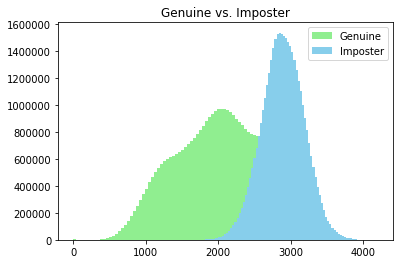

In [9]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.metrics.pairwise import euclidean_distances

binary_y = Y_dtrain[Y_dtrain.isin([0,1])].sort_values()
binary_x = X_dtrain.loc[list(binary_y.index)]

X = np.array(binary_x)
Y = np.array(binary_y).reshape((4684+4132),1)                                                    #from above questions we can observe that [0]4132, [1]4684.
y_score = euclidean_distances(X,X)                                                                   #find the pairwise distances for all genuine and imposter matches.
y = euclidean_distances(Y,Y)

#compute genuine and imposter by stack arrays in sequence horizontally.
genuine = np.hstack([y_score[:4132,:4132].reshape(1,4132*4132), y_score[4132:,4132:].reshape(1,4684*4684)])
imposter = np.hstack([y_score[:4132,4132:].reshape(1,4132*4684),y_score[4132:,:4132].reshape(1,4132*4684)])

#plot histograms of the genuine and impostor distances on the same set of axes.
plt.hist(genuine[0], alpha = 1, bins = 100, color = 'lightgreen', label = 'Genuine',)
plt.hist(imposter[0], alpha = 1, bins = 100, color = 'skyblue', label = 'Imposter')
plt.title('Genuine vs. Imposter')
plt.legend()
plt.show()

(f) Generate an ROC curve from the above sets of distances. What is the equal error rate? What is the error rate of a classifier that simply guesses randomly?

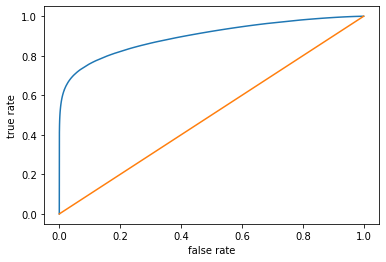

In [12]:
#from sklearn.metrics.pairwise import euclidean_distances
#from sklearn import metrics

#Generate an ROC curve.
y_score = - (euclidean_distances(X,X)).reshape(1, (4684+4132)*(4684+4132))            #from above questions we can observe that [0]4132, [1]4684.
y = (euclidean_distances(Y,Y)).reshape(1,  (4684+4132)*(4684+4132))                
fp,tp, thresholds = metrics.roc_curve(y[0],y_score[0])                                           
plt.plot(tp, fp)                                                                                                    #plot the ROC curve
plt.plot([0,1],[0,1])
plt.plot(color = 'colors')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [27]:
#Compute the equal error rate.
def generate_equal_error_rate(tpr,fpr,thresholds):                                                  #False Positive Rate (FPR)
    n = np.argmin(np.abs((1-tpr)-fpr))                                                                    #True Positive Rate (TPR)
    eer = 1-np.mean(((1-tpr)[n],fpr[n]))
    return eer
eer = generate_equal_error_rate(tp,fp,thresholds)
print(eer)

0.1855478851724539


According to the above, the EER is about 0.186.
Guess randomly, the EER of a classifier may be 0.5.

(g) Implement a K-NN classifier.

In [27]:
#from collections import Counter
#implement a K-NN classifier

def generate_k_nn_classifier(X_dtrain,Y_dtrain,X_dtest ,n):
    Y_test=[]
    for i in range(len(X_dtest)):
        neighbors = np.argsort(((np.array(X_dtest.iloc[i])-np.array(X_dtrain))**2).sum(-1))
        prediction = Counter(Y_dtrain.iloc[neighbors[:n]]).most_common(1)[0][0]
        Y_test.append(prediction)
    return Y_test